In [1]:
from pymna import Circuit
from pymna.units import kOhm,uF, V, Hz, um, kHz
from pymna.simulator import Simulator
import matplotlib.pyplot as plt
import os

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%matplotlib ipympl
%autoreload 2
basepath = os.getcwd()
print(basepath)

/Users/jodafons/Desktop/pymna/examples


In [44]:
# signal input
Hz=1
s=1
fs = 1000*Hz
Ts = 1/fs
duration = 0.01*s
ns = duration/Ts



# clock signal
fclk = 50*fs
Tclk = 1/fclk 
nclk = duration / (Tclk)

circuit = Circuit()
circuit.SinusoidalVoltageSource('in', circuit.gnd, 
                                amplitude=1, 
                                frequency=fs, 
                                number_of_cycles=ns, 
                                dc=0,
                                name='Vsin')
circuit.OpAmp( 'in', 'out1', 'out1' )
circuit.mosfet_channel_n('out1', 'base', 'in2' , W=5*um , L=5*um )
circuit.PulseVoltageSource( 'base', circuit.gnd,
                                    amplitude_1 = 0,
                                    amplitude_2 = 5,
                                    T = Tclk,
                                    number_of_cycles = nclk,
                                    time_on = 0.1*Tclk)
circuit.C('in2', circuit.gnd, 3e-12 )
#circuit.R('in2',circuit.gnd, 5000000)

#circuit.R('aux',circuit.gnd,5)
circuit.OpAmp( 'in2', 'out', 'out' )
circuit.R('out', circuit.gnd, 1000000)
print(circuit.nodes)
simulator = Simulator()
r = simulator.transient( circuit , duration, duration/10000, verbose=False)


{0: 0, 'in': 1, 'out1': 2, 'base': 3, 'in2': 4, 'out': 5}
Transient simulation started with end_time=0.01, step_time=1e-06
max_number_of_internal_step=1, max_tolerance=0.0001
Max number of nodes: 5


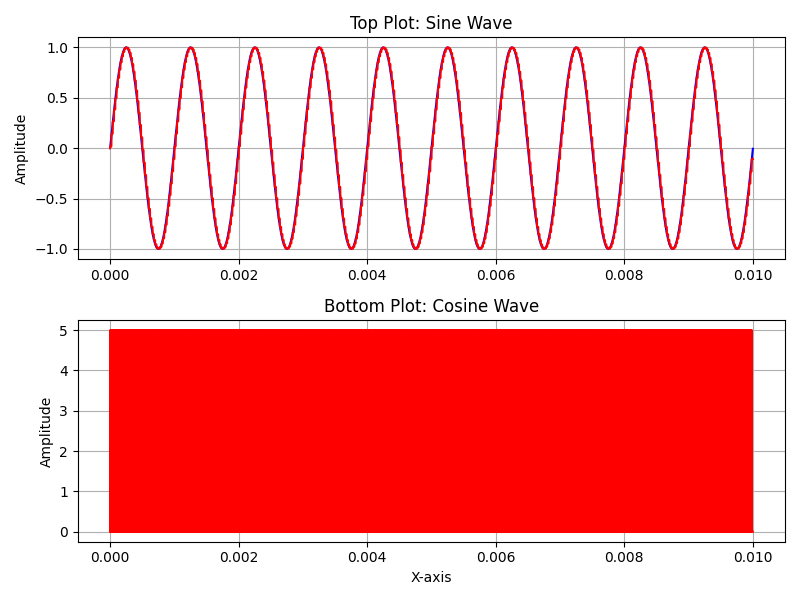

In [45]:
# Create a figure and a 2x1 grid of subplots
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 6)) # figsize for better visualization
x = r['t']
y1=r['in']
y2=r['base']
y3=r['out']

# Plot on the top subplot (ax[0])
ax[0].plot(x, y1, color='blue')
ax[0].plot(x, y3, color='red')

ax[0].set_title('Top Plot: Sine Wave')
ax[0].set_ylabel('Amplitude')
ax[0].grid(True)

# Plot on the bottom subplot (ax[1])
ax[1].plot(x, y2, color='red')
ax[1].set_title('Bottom Plot: Cosine Wave')
ax[1].set_xlabel('X-axis')
ax[1].set_ylabel('Amplitude')
ax[1].grid(True)

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plot
plt.show()

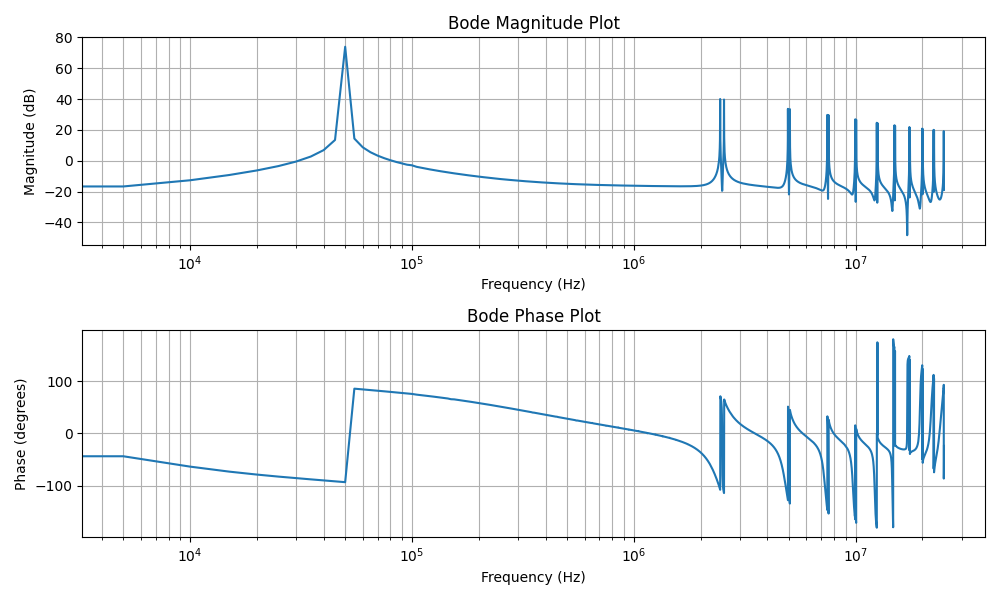

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
sampling_rate = fclk *1000# Hz
duration = 1          # seconds
frequency = 1000        # Hz
amplitude = 1
phase = 0             # radians

# Time vector
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Sinusoidal signal
#signal = amplitude * np.sin(2 * np.pi * frequency * t + phase)
signal = y3
# 2. (Optional) Apply a window function
# windowed_signal = signal * np.hanning(len(signal))

# 3. Perform FFT
fft_output = np.fft.fft(signal) # or windowed_signal

# 4. Calculate frequency axis
frequencies = np.fft.fftfreq(len(signal), d=1/sampling_rate)
# Select positive frequencies for plotting
positive_freq_indices = np.where(frequencies >= 0)
positive_frequencies = frequencies[positive_freq_indices]
positive_fft_output = fft_output[positive_freq_indices]

# 5. Calculate Magnitude and Phase
magnitude_db = 20 * np.log10(np.abs(positive_fft_output))
phase_deg = np.degrees(np.angle(positive_fft_output))

# 6. Plot the Bode Plot
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.semilogx(positive_frequencies, magnitude_db)
plt.title('Bode Magnitude Plot')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True, which="both", ls="-")

plt.subplot(2, 1, 2)
plt.semilogx(positive_frequencies, phase_deg)
plt.title('Bode Phase Plot')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.grid(True, which="both", ls="-")

plt.tight_layout()
plt.show()